Importing Dataset from Github

In [ ]:
# pip install os
import requests
import os
import os
import random
import shutil

from zipfile import ZipFile
from io import BytesIO

# Replace with your GitHub dataset link
github_url = "https://github.com/spMohanty/PlantVillage-Dataset/archive/442d23a8a486febaad5c91e3c13ce30d4cd302ca.zip"

# Define the download and extraction paths
download_path = "/plantvillage.zip"  # Change to your desired download path
extract_path = "/plantvillage"  # Change to your desired extraction path

# Download the dataset
response = requests.get(github_url)
with open(download_path, "wb") as f:
    f.write(response.content)

# Extract the downloaded zip file
with ZipFile(download_path, "r") as zip_ref:
    zip_ref.extractall(extract_path)

# Remove the downloaded zip file
os.remove(download_path)

# List all subfolders (classes) in the dataset
class_folders = os.listdir(os.path.join(extract_path, "PlantVillage-Dataset-442d23a8a486febaad5c91e3c13ce30d4cd302ca", "raw", "color"))



**Spliting the data into train test and split**

In [ ]:
random.seed(42)
# Set the paths to your source data and destination directories
source_data_dir = '/content/plantvillage/PlantVillage-Dataset-442d23a8a486febaad5c91e3c13ce30d4cd302ca/raw/color'  # Path to your data folders
train_dir = 'trained'  # Destination for training data
valid_dir = 'valided'  # Destination for validation data
test_dir = 'tested'    # Destination for test data

# Create destination directories if they don't exist
os.makedirs(train_dir, exist_ok=True)
os.makedirs(valid_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

# Define split ratios (e.g., 60% train, 20% validation, 20% test)
split_ratio_train = 0.6
split_ratio_valid = 0.2

# Loop through each class folder in the source directory
class_folders = os.listdir(source_data_dir)
for class_folder in class_folders:
    class_path = os.path.join(source_data_dir, class_folder)
    if os.path.isdir(class_path):
        images = os.listdir(class_path)
        num_images = len(images)
        num_train = int(num_images * split_ratio_train)
        num_valid = int(num_images * split_ratio_valid)

        # Randomly shuffle the images
        random.shuffle(images)

        # Move images to train directory
        for image in images[:num_train]:
            src_path = os.path.join(class_path, image)
            dest_path = os.path.join(train_dir, class_folder, image)
            os.makedirs(os.path.dirname(dest_path), exist_ok=True)
            shutil.copy(src_path, dest_path)

        # Move images to validation directory
        for image in images[num_train:num_train + num_valid]:
            src_path = os.path.join(class_path, image)
            dest_path = os.path.join(valid_dir, class_folder, image)
            os.makedirs(os.path.dirname(dest_path), exist_ok=True)
            shutil.copy(src_path, dest_path)

        # Move remaining images to test directory
        for image in images[num_train + num_valid:]:
            src_path = os.path.join(class_path, image)
            dest_path = os.path.join(test_dir, class_folder, image)
            os.makedirs(os.path.dirname(dest_path), exist_ok=True)
            shutil.copy(src_path, dest_path)

print("Data splitting completed.")


In [5]:
import torch
import torchvision
import torch.nn as nn
import torchvision.transforms as transforms
import numpy as np
import torchvision.models
import glob
import pathlib
import torch.optim
from torch.optim import lr_scheduler
from torchvision import transforms, datasets, models
import torch.optim as optim
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import matplotlib.pyplot as plt
import numpy as np
import os

**After Completion of Data Processing **

In [3]:
# Define the transformation pipeline
transform = transforms.Compose([
    transforms.ToTensor()
])

# Correct the usage of the 'transform' variable
train_data = torchvision.datasets.ImageFolder("train", transform=transform)
test_data = torchvision.datasets.ImageFolder("test", transform=transform)
val_data = torchvision.datasets.ImageFolder("valid", transform=transform)



Balanced Dataset Total 38 classes .Total images 38000 

[0, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000]


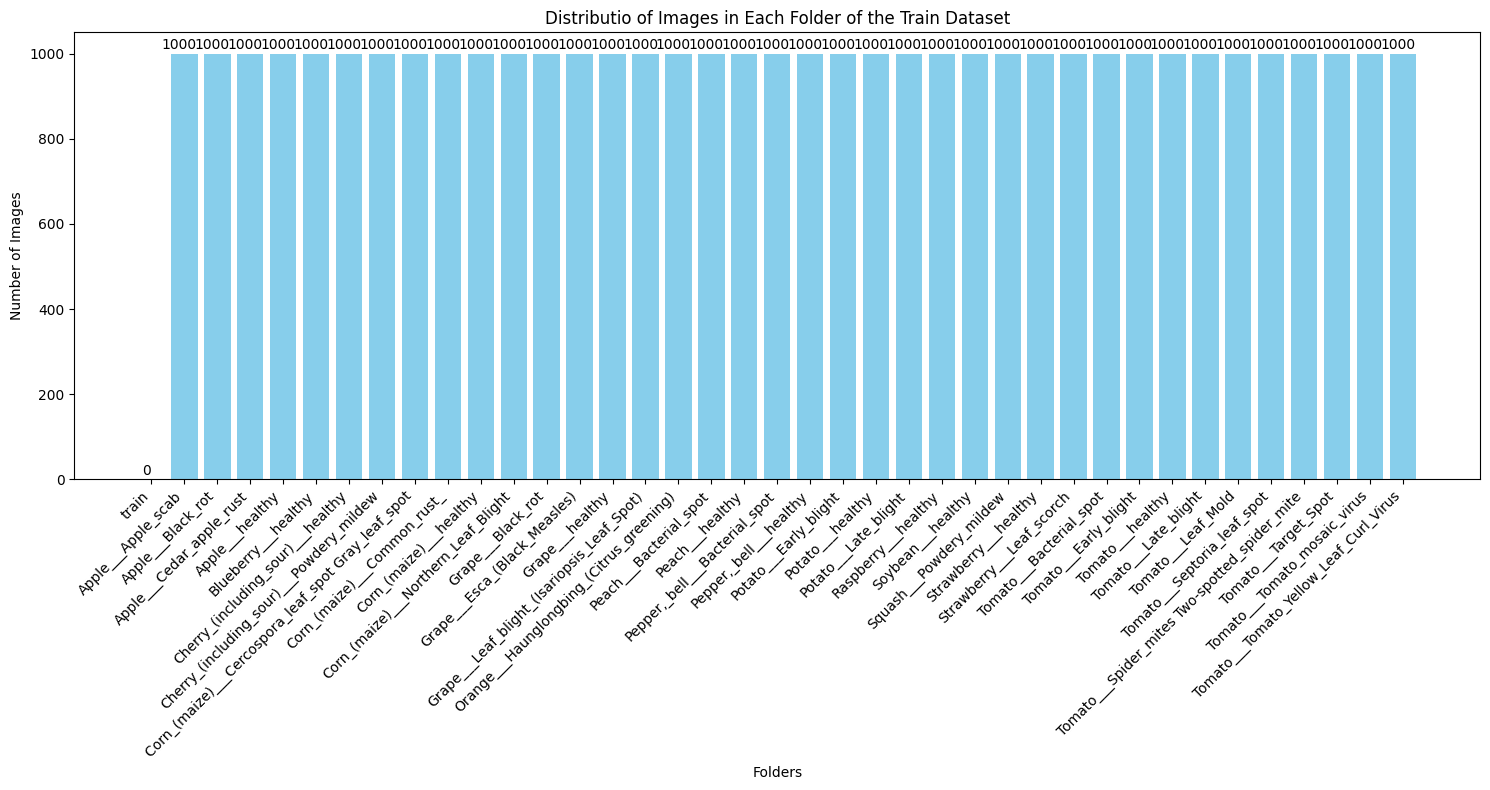

['train', 'Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___healthy', 'Corn_(maize)___Northern_Leaf_Blight', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___healthy', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___healthy', 'Potato___Late_blight', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___healthy', 'Strawberry___Leaf_scorch', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___healthy', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spid

In [6]:
folder_counts = {}
for root, dirs, files in os.walk("train"):
    folder_name = os.path.basename(root)
    folder_count = len(files)
    folder_counts[folder_name] = folder_count

# Create a bar graph with annotations
folders = list(folder_counts.keys())
image_counts = list(folder_counts.values())

plt.figure(figsize=(15, 8))  # Adjust the figure size as needed
bars = plt.bar(folders, image_counts, color='skyblue')

# Add annotations above each bar
for bar, count in zip(bars, image_counts):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.15, bar.get_height() + 10, str(count), ha='center', color='black')
print(image_counts)

plt.xlabel('Folders')
plt.ylabel('Number of Images')
plt.title('Distributio of Images in Each Folder of the Train Dataset')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()
print(folders)

[0, 126, 124, 55, 150, 150, 150, 150, 102, 150, 150, 150, 150, 150, 84, 150, 150, 150, 72, 150, 150, 150, 30, 150, 74, 150, 150, 91, 150, 150, 150, 150, 150, 150, 150, 150, 150, 74, 150]


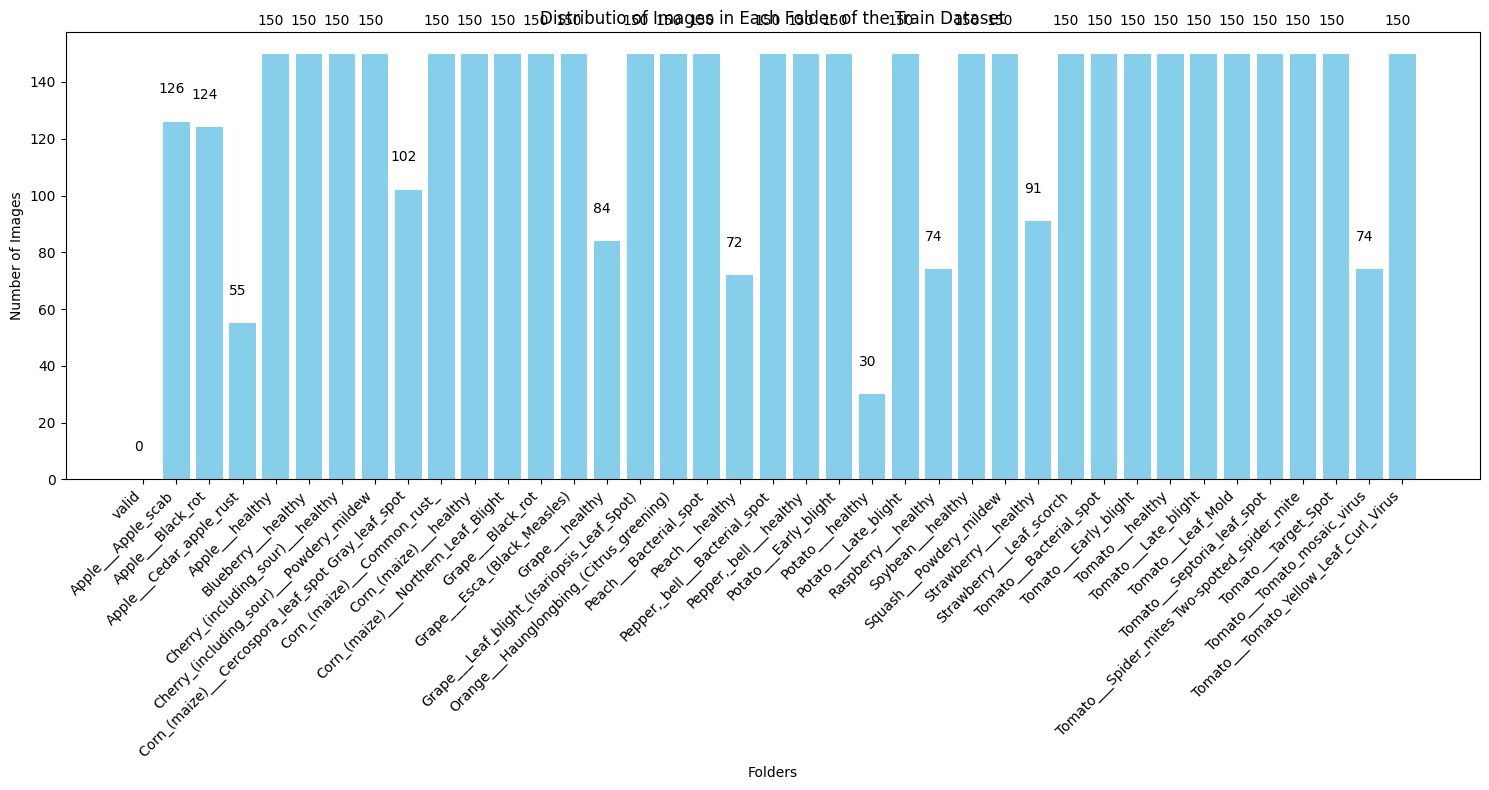

In [7]:
folder_counts = {}
for root, dirs, files in os.walk("valid"):
    folder_name = os.path.basename(root)
    folder_count = len(files)
    folder_counts[folder_name] = folder_count

# Create a bar graph with annotations
folders = list(folder_counts.keys())
image_counts = list(folder_counts.values())

plt.figure(figsize=(15, 8))  # Adjust the figure size as needed
bars = plt.bar(folders, image_counts, color='skyblue')

# Add annotations above each bar
for bar, count in zip(bars, image_counts):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.15, bar.get_height() + 10, str(count), ha='center', color='black')
print(image_counts)

plt.xlabel('Folders')
plt.ylabel('Number of Images')
plt.title('Distributio of Images in Each Folder of the Train Dataset')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

[0, 126, 125, 55, 150, 150, 150, 150, 104, 150, 150, 150, 150, 150, 86, 150, 150, 150, 72, 150, 150, 150, 31, 150, 75, 150, 150, 92, 150, 150, 150, 150, 150, 150, 150, 150, 150, 76, 150]


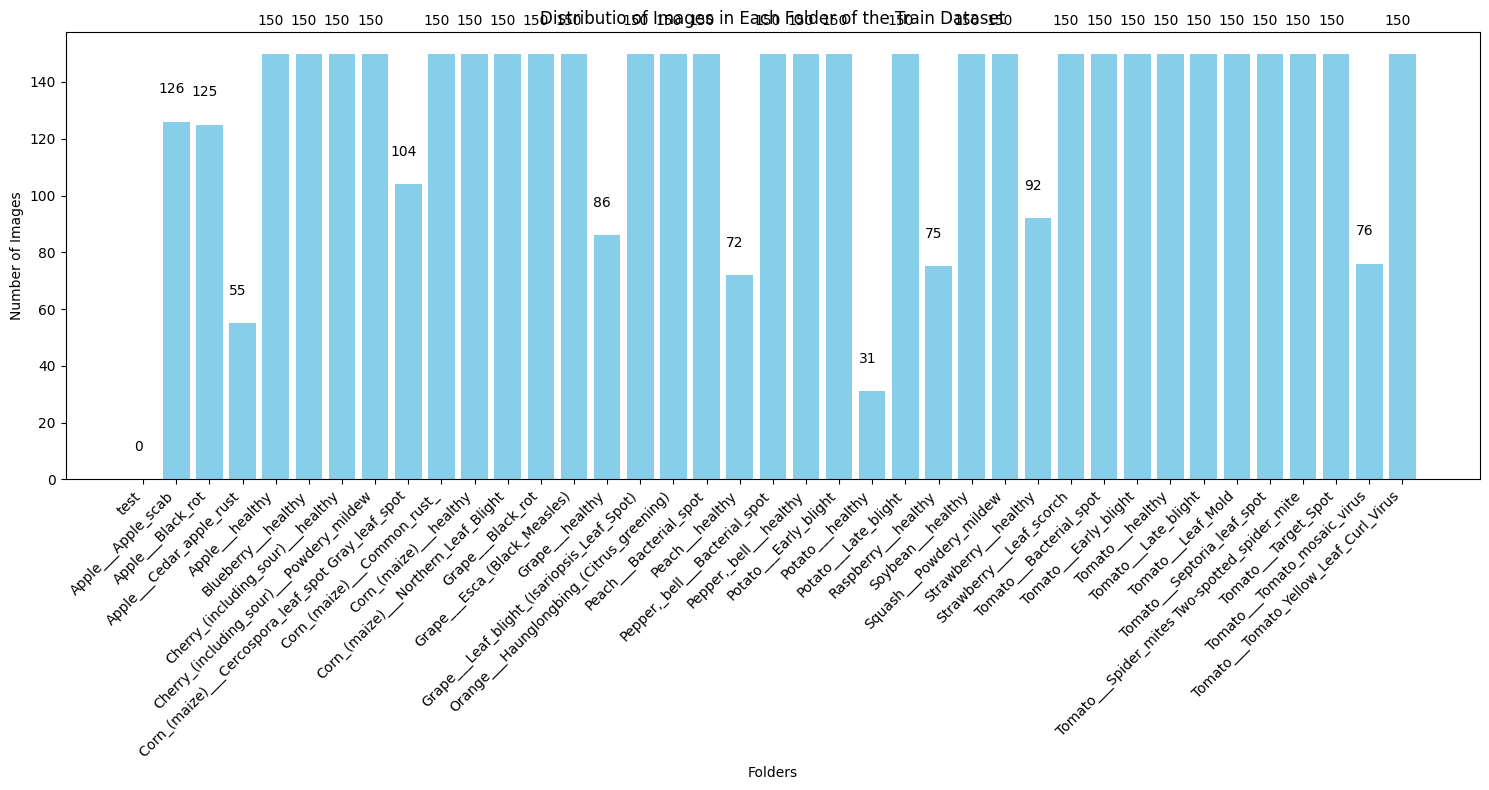

In [8]:
import os 
folder_counts = {}
for root, dirs, files in os.walk("test"):
    folder_name = os.path.basename(root)
    folder_count = len(files)
    folder_counts[folder_name] = folder_count

# Create a bar graph with annotations
folders = list(folder_counts.keys())
image_counts = list(folder_counts.values())

plt.figure(figsize=(15, 8))  # Adjust the figure size as needed
bars = plt.bar(folders, image_counts, color='skyblue')

# Add annotations above each bar
for bar, count in zip(bars, image_counts):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.15, bar.get_height() + 10, str(count), ha='center', color='black')
print(image_counts)

plt.xlabel('Folders')
plt.ylabel('Number of Images')
plt.title('Distributio of Images in Each Folder of the Train Dataset')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

In [7]:
batch_size = 32
train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size, shuffle=True)
valid_loader = torch.utils.data.DataLoader(val_data, batch_size=batch_size, shuffle=True)
print(f"Train No of Batches {len(train_loader)}\n Test No of Batches {len(test_loader)}\n Valid No of Batches {len(valid_loader)}")

Train No of Batches 1188
 Test No of Batches 158
 Valid No of Batches 158


batch 32 take 26 s

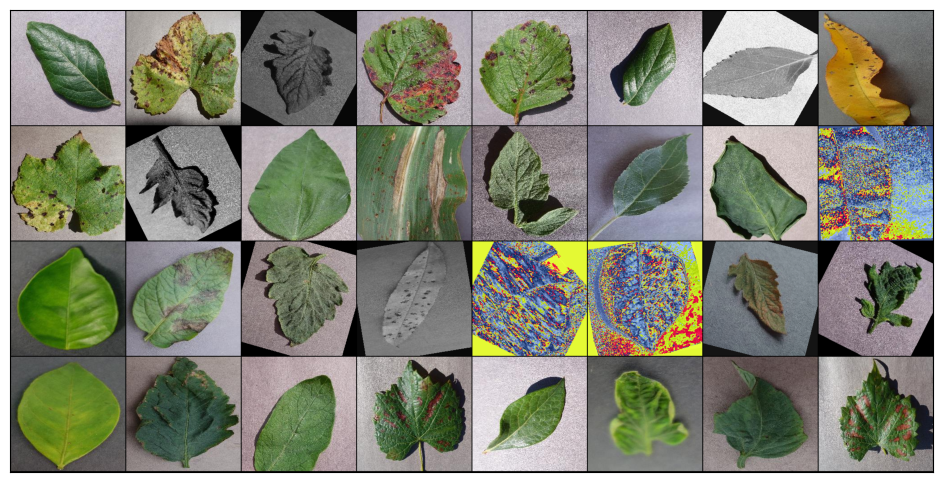

In [10]:
import matplotlib.pyplot as plt
from torchvision.utils import make_grid
def show_batch(dl):
    for images, labels in dl:
        fig, ax = plt.subplots(figsize=(12,6))
        ax.set_xticks([]); ax.set_yticks([])
        ax.imshow(make_grid(images, nrow=8).permute(1, 2, 0))
        break
show_batch(train_loader)

RESNET 18 MODEL 

In [64]:
model=torchvision.models.resnet18(pretrained=True)
for p in model.parameters():
  p.requires_grad=True

num_ftrs=model.fc.in_features
# dropout_prob = 0.05  # Adjust as needed

model.fc = nn.Sequential(
    nn.Linear(num_ftrs, 38)  # Assuming 38 classes in your dataset
)


C:\Users\jagan sri\AppData\Roaming\Python\Python310\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\jagan sri\AppData\Roaming\Python\Python310\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Train the model using adam optimizer

In [65]:
import torch.optim as optim
import torch.nn as nn
import pickle

all = []
# Define loss function and optimizer
loss = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
num_epochs = 8  # Adjust as needed
best_val_accuracy = float('-inf')
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

train_accuracies = []  # List to store training accuracies
val_accuracies = []    # List to store validation accuracies
train_losses = []      # List to store training losses
val_losses = []        # List to store validation losses
min_accuracy_difference=0.001
for epoch in range(num_epochs):
    
    model.train()
    running_loss = 0.0
    correct_train_predictions = 0
    total_train_samples = 0
    i = 1
    for inputs, labels in train_loader:
        if(i % 200 == 0):
            print(i)
        i += 1
        inputs, labels = inputs.to(device), labels.to(device)
        total_train_samples += labels.size(0)

        optimizer.zero_grad()
        outputs = model(inputs)
        loss_value = loss(outputs, labels)
        loss_value.backward()
        optimizer.step()

        running_loss += loss_value.item() * inputs.size(0)

        _, train_predicted = torch.max(outputs, 1)
        correct_train_predictions += torch.sum(train_predicted == labels.data)

    epoch_loss = running_loss / total_train_samples
    train_accuracy = correct_train_predictions.double() / total_train_samples
    print('train is completed')
    
    # Validation
    model.eval()
    val_running_loss = 0.0
    correct_val_predictions = 0

    with torch.no_grad():
        for val_inputs, val_labels in valid_loader:
            val_inputs, val_labels = val_inputs.to(device), val_labels.to(device)
            val_outputs = model(val_inputs)
            val_loss_value = loss(val_outputs, val_labels)
            val_running_loss += val_loss_value.item() * val_inputs.size(0)

            _, val_predicted = torch.max(val_outputs, 1)
            correct_val_predictions += torch.sum(val_predicted == val_labels.data)

    val_epoch_loss = val_running_loss / len(val_data)
    val_accuracy = correct_val_predictions.double() / len(val_data)
    
    all.append(f"Epoch [{epoch}], train_loss: {epoch_loss:.4f}, val_loss: {val_epoch_loss:.4f}, train_acc: {train_accuracy:.4f}, val_acc: {val_accuracy:.4f}")
    print(f"Epoch [{epoch}], train_loss: {epoch_loss:.4f}, val_loss: {val_epoch_loss:.4f}, train_acc: {train_accuracy:.4f}, val_acc: {val_accuracy:.4f}")
    
    if val_accuracy > best_val_accuracy:
        print(f"Validation accuracy increased from {best_val_accuracy:.4f} to {val_accuracy:.4f}. Updating best weights.")
        best_val_accuracy = val_accuracy
        # Save the current model weights with the epoch number in the filename
        with open(f'resnet18_model_epoch_{epoch}.pkl', 'wb') as f:
            pickle.dump(model, f)

    # Check if the difference between consecutive training accuracies is less than the minimum
    if epoch > 0 and np.abs(train_accuracy - prev_train_accuracy) < min_accuracy_difference:
        print(f"Training stopped as the difference in training accuracy between epoch {epoch} and {epoch - 1} is less than {min_accuracy_difference}.")
        break
    if (epoch>0 and train_accuracy>95 and (val_accuracy- prev_val_accuracy < 0)):
        print(f"Training stopped as the difference in validation accuracy between epoch {epoch} and {epoch - 1} is decreasing")
        break
    prev_train_accuracy = train_accuracy
    prev_val_accuracy = val_accuracy
    train_accuracies.append(train_accuracy.item())
    val_accuracies.append(val_accuracy.item())
    train_losses.append(epoch_loss)
    val_losses.append(val_epoch_loss)

print("Training complete.")

200
400
600
800
1000
train is completed
Epoch [0], train_loss: 0.6249, val_loss: 0.3124, train_acc: 0.8133, val_acc: 0.9042
Validation accuracy increased from -inf to 0.9042. Updating best weights.
200
400
600
800
1000
train is completed
Epoch [1], train_loss: 0.3616, val_loss: 0.1821, train_acc: 0.8926, val_acc: 0.9406
Validation accuracy increased from 0.9042 to 0.9406. Updating best weights.
200
400
600
800
1000
train is completed
Epoch [2], train_loss: 0.2900, val_loss: 0.3749, train_acc: 0.9141, val_acc: 0.9050
200
400
600
800
1000
train is completed
Epoch [3], train_loss: 0.2512, val_loss: 0.1351, train_acc: 0.9251, val_acc: 0.9605
Validation accuracy increased from 0.9406 to 0.9605. Updating best weights.


Model Training from 4th epoch 

In [12]:
import torch.optim as optim
import torch.nn as nn
import pickle
with open('resnet18_model_epoch_3.pkl', 'rb') as f:
    model12 = pickle.load(f)
all = []
all.append("Epoch [0], train_loss: 0.6249, val_loss: 0.3124, train_acc: 0.8133, val_acc: 0.9042")
all.append("Epoch [1], train_loss: 0.3616, val_loss: 0.1821, train_acc: 0.8926, val_acc: 0.9406")
all.append("Epoch [2], train_loss: 0.2900, val_loss: 0.3749, train_acc: 0.9141, val_acc: 0.9050")
all.append("Epoch [3], train_loss: 0.2512, val_loss: 0.1351, train_acc: 0.9251, val_acc: 0.9605")
# Define loss function and optimizer
loss = nn.CrossEntropyLoss()
optimizer = optim.Adam(model12.parameters(), lr=0.001)

# Training loop
num_epochs = 8  # Adjust as needed
best_val_accuracy = 0.9605
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model12.to(device)

train_accuracies = [0.8133, 0.8926, 0.9141, 0.9251]
val_accuracies = [0.9042, 0.9406, 0.9050, 0.9605]
train_losses = [0.6249, 0.3616, 0.2900, 0.2512]
val_losses = [0.3124, 0.1821, 0.3749, 0.1351]

min_accuracy_difference=0.001
prev_train_accuracy = 0.9251
prev_val_accuracy=0.9605
for epoch in range(4,num_epochs):
    
    model12.train()
    running_loss = 0.0
    correct_train_predictions = 0
    total_train_samples = 0
    i = 1
    for inputs, labels in train_loader:
        if(i % 200 == 0):
            print(i)
        i += 1
        inputs, labels = inputs.to(device), labels.to(device)
        total_train_samples += labels.size(0)

        optimizer.zero_grad()
        outputs = model12(inputs)
        loss_value = loss(outputs, labels)
        loss_value.backward()
        optimizer.step()

        running_loss += loss_value.item() * inputs.size(0)

        _, train_predicted = torch.max(outputs, 1)
        correct_train_predictions += torch.sum(train_predicted == labels.data)

    epoch_loss = running_loss / total_train_samples
    train_accuracy = correct_train_predictions.double() / total_train_samples
    print('train is completed')
    
    # Validation
    model12.eval()
    val_running_loss = 0.0
    correct_val_predictions = 0

    with torch.no_grad():
        for val_inputs, val_labels in valid_loader:
            val_inputs, val_labels = val_inputs.to(device), val_labels.to(device)
            val_outputs = model12(val_inputs)
            val_loss_value = loss(val_outputs, val_labels)
            val_running_loss += val_loss_value.item() * val_inputs.size(0)

            _, val_predicted = torch.max(val_outputs, 1)
            correct_val_predictions += torch.sum(val_predicted == val_labels.data)

    val_epoch_loss = val_running_loss / len(val_data)
    val_accuracy = correct_val_predictions.double() / len(val_data)
    
    all.append(f"Epoch [{epoch}], train_loss: {epoch_loss:.4f}, val_loss: {val_epoch_loss:.4f}, train_acc: {train_accuracy:.4f}, val_acc: {val_accuracy:.4f}")
    print(f"Epoch [{epoch}], train_loss: {epoch_loss:.4f}, val_loss: {val_epoch_loss:.4f}, train_acc: {train_accuracy:.4f}, val_acc: {val_accuracy:.4f}")
    
    if val_accuracy > best_val_accuracy:
        print(f"Validation accuracy increased from {best_val_accuracy:.4f} to {val_accuracy:.4f}. Updating best weights.")
        best_val_accuracy = val_accuracy
        # Save the current model weights with the epoch number in the filename
        with open(f'resnet18_model12_epoch_{epoch}.pkl', 'wb') as f:
            pickle.dump(model12, f)

    # Check if the difference between consecutive training accuracies is less than the minimum
    if epoch > 0 and np.abs(train_accuracy - prev_train_accuracy) < min_accuracy_difference:
        print(f"Training stopped as the difference in training accuracy between epoch {epoch} and {epoch - 1} is less than {min_accuracy_difference}.")
        break
    if (epoch>0 and train_accuracy>95 and (val_accuracy- prev_val_accuracy < 0)):
        print(f"Training stopped as the difference in validation accuracy between epoch {epoch} and {epoch - 1} is decreasing")
        break
    prev_train_accuracy = train_accuracy
    prev_val_accuracy = val_accuracy
    train_accuracies.append(train_accuracy.item())
    val_accuracies.append(val_accuracy.item())
    train_losses.append(epoch_loss)
    val_losses.append(val_epoch_loss)

print("Training complete.")

200
400
600
800
1000
train is completed
Epoch [4], train_loss: 0.2269, val_loss: 0.1558, train_acc: 0.9317, val_acc: 0.9505
200
400
600
800
1000
train is completed
Epoch [5], train_loss: 0.1913, val_loss: 0.2119, train_acc: 0.9424, val_acc: 0.9414
200
400
600
800
1000
train is completed
Epoch [6], train_loss: 0.1563, val_loss: 0.1192, train_acc: 0.9524, val_acc: 0.9680
Validation accuracy increased from 0.9605 to 0.9680. Updating best weights.
200
400
600
800
1000
train is completed
Epoch [7], train_loss: 0.1292, val_loss: 0.1235, train_acc: 0.9601, val_acc: 0.9666
Training complete.


Plot Diagram for Train Accuracy vs Validation Accuracy and Train Loss vs Validation Loss

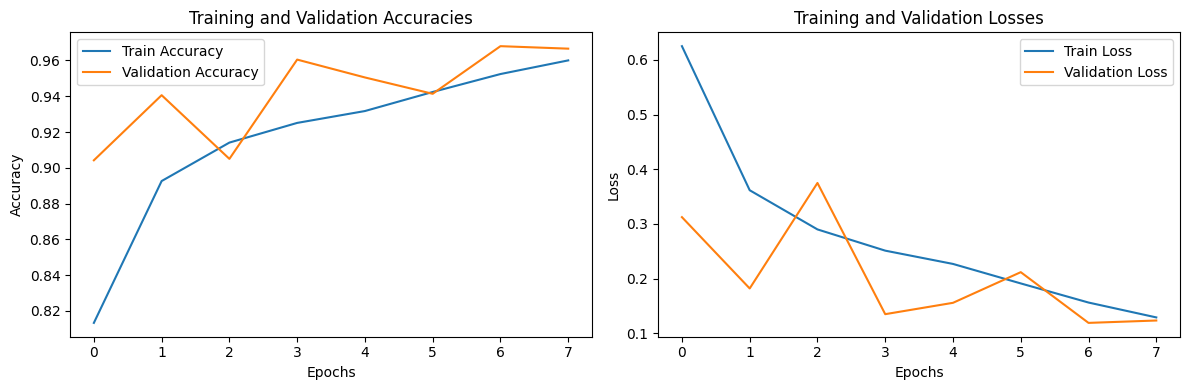

In [13]:
# Plotting the accuracy and loss graphs
epochs_range = range(epoch+1)
plt.figure(figsize=(12, 4))

# Subplot for accuracy
plt.subplot(1, 2, 1)
plt.plot(epochs_range, train_accuracies, label='Train Accuracy')
plt.plot(epochs_range, val_accuracies, label='Validation Accuracy')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracies')

# Subplot for loss
plt.subplot(1, 2, 2)
plt.plot(epochs_range, train_losses, label='Train Loss')
plt.plot(epochs_range, val_losses, label='Validation Loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Losses')

plt.tight_layout()
plt.show()

C:\Users\jagan sri\AppData\Local\Temp\ipykernel_14108\4107141031.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(['{:.0f}%'.format(x) for x in plt.gca().get_yticks()])


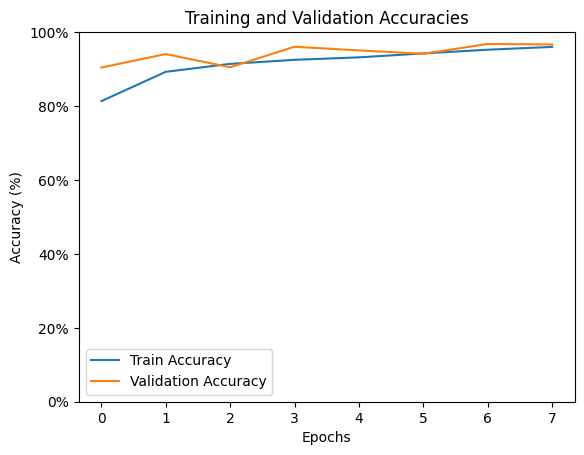

In [14]:
import matplotlib.pyplot as plt

epochs_range = range(epoch+1)
plt.plot(epochs_range, [acc * 100 for acc in train_accuracies], label='Train Accuracy')
plt.plot(epochs_range, [acc * 100 for acc in val_accuracies], label='Validation Accuracy')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.title('Training and Validation Accuracies')

# Set y-axis lower limit to 0 and upper limit to 100
plt.ylim(0, 100)

# Format y-axis tick labels as percentages
plt.gca().set_yticklabels(['{:.0f}%'.format(x) for x in plt.gca().get_yticks()])

plt.show()


Test the model

In [15]:
correct_predictions = [0] * 38  # To keep track of correct predictions for each class
total_samples = [0] * 38  # To keep track of total samples for each class

model12.eval()  # Set the model to evaluation mode


with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to('cpu'), labels.to('cpu')
        outputs = model12(inputs)
        _, predicted = torch.max(outputs, 1)

        # Update statistics for each class
        for i in range(len(predicted)):
            total_samples[labels[i]] += 1
            if predicted[i] == labels[i]:
                correct_predictions[labels[i]] += 1

# Calculate and print performance for each class
class_folders=['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Target_Spot', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Tomato___Tomato_mosaic_virus', 'Tomato___healthy']
for i in range(38):
    accuracy = correct_predictions[i] / total_samples[i] if total_samples[i] > 0 else 0
    print(f"Class {class_folders[i]}: \n\t Accuracy = {accuracy:.2%} ({correct_predictions[i]}/{total_samples[i]})")

overall_accuracy = sum(correct_predictions) / sum(total_samples)
print(f"\nOverall Accuracy: {overall_accuracy:.2%}")

Class Apple___Apple_scab: 
	 Accuracy = 99.21% (125/126)
Class Apple___Black_rot: 
	 Accuracy = 100.00% (125/125)
Class Apple___Cedar_apple_rust: 
	 Accuracy = 100.00% (55/55)
Class Apple___healthy: 
	 Accuracy = 100.00% (150/150)
Class Blueberry___healthy: 
	 Accuracy = 100.00% (150/150)
Class Cherry_(including_sour)___Powdery_mildew: 
	 Accuracy = 99.33% (149/150)
Class Cherry_(including_sour)___healthy: 
	 Accuracy = 96.67% (145/150)
Class Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot: 
	 Accuracy = 92.31% (96/104)
Class Corn_(maize)___Common_rust_: 
	 Accuracy = 98.00% (147/150)
Class Corn_(maize)___Northern_Leaf_Blight: 
	 Accuracy = 95.33% (143/150)
Class Corn_(maize)___healthy: 
	 Accuracy = 100.00% (150/150)
Class Grape___Black_rot: 
	 Accuracy = 100.00% (150/150)
Class Grape___Esca_(Black_Measles): 
	 Accuracy = 97.33% (146/150)
Class Grape___Leaf_blight_(Isariopsis_Leaf_Spot): 
	 Accuracy = 99.33% (149/150)
Class Grape___healthy: 
	 Accuracy = 100.00% (86/86)
Class Orang

In [18]:
true_labels = []
test_predictions = []

model12.eval()  # Set the model to evaluation mode

with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        outputs = model12(inputs)
        _, predicted = torch.max(outputs, 1)

        true_labels.extend(labels.cpu().numpy())
        test_predictions.extend(predicted.cpu().numpy())

In [19]:
# Calculate F1 score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import f1_score, confusion_matrix
import numpy as np

test_predictions = np.array(test_predictions)
true_labels = np.array(true_labels)

f1_micro = f1_score(true_labels, test_predictions, average='micro')
f1_macro = f1_score(true_labels, test_predictions, average='macro')

print(f"F1 Micro Score: {f1_micro:.4f}")
print(f"F1 Macro Score: {f1_macro:.4f}")

# Confusion Matrix
precision_micro, recall_micro, f1_micro, _ = precision_recall_fscore_support(true_labels, test_predictions, average='micro')

print("Overall Metrics (Micro-average):")
print(f"\t Precision = {precision_micro:.4f}")
print(f"\t Recall    = {recall_micro:.4f}")
print(f"\t F1 Score  = {f1_micro:.4f}")
# Print or visualize the confusion matrix
conf_matrix = confusion_matrix(true_labels, test_predictions, labels=range(38))

print("Confusion Matrix:")
print(conf_matrix)


F1 Micro Score: 0.9649
F1 Macro Score: 0.9667
Overall Metrics (Micro-average):
	 Precision = 0.9649
	 Recall    = 0.9649
	 F1 Score  = 0.9649
Confusion Matrix:
[[125   0   0 ...   0   0   0]
 [  0 125   0 ...   0   0   0]
 [  0   0  55 ...   0   0   0]
 ...
 [  0   0   0 ... 150   0   0]
 [  0   0   0 ...   1  74   0]
 [  0   0   0 ...   0   0 150]]


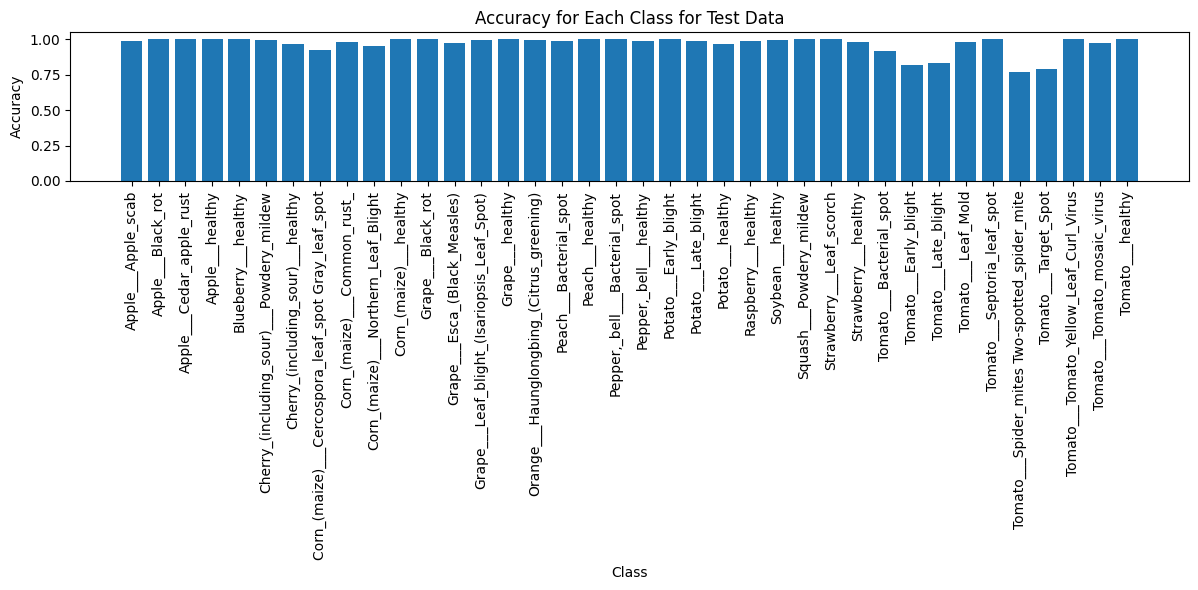

In [20]:
import matplotlib.pyplot as plt

# Calculate accuracy values for each class
class_accuracy = [correct_predictions[i] / total_samples[i] if total_samples[i] > 0 else 0 for i in range(38)]

# Plotting the bar graph
plt.figure(figsize=(12, 6))  # Adjust the figure size if needed
plt.bar(class_folders, class_accuracy)
plt.xlabel('Class')
plt.ylabel('Accuracy')
plt.title('Accuracy for Each Class for Test Data')
plt.xticks(rotation=90)  # Rotate class names for better visibility
plt.tight_layout()  # Ensure labels fit within the figure
plt.show()


Running the Trained Weights

In [25]:
from PIL import Image
import pickle
from torchvision import transforms

# Define the transformation
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
])
with open('resnet18_model12_epoch_7.pkl', 'rb') as f:
    model13 = pickle.load(f) 
model13.eval()
class_labels =['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Target_Spot', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Tomato___Tomato_mosaic_virus', 'Tomato___healthy']

def get_class_label(class_index):
    return class_labels[class_index]

def predict_image(img):
    image = transform(img).unsqueeze(0)
    with torch.no_grad():
        outputs = model13(image)
        print(len(outputs[0])) 
        print(outputs)
    _, predicted = torch.max(outputs, 1)

    print(predicted) 
    class_index = predicted.item()
    class_label = get_class_label(class_index)
    return {"class_index": class_index, "class_label": class_label}

    class_labels =train_data.classes

# Load the imagetrain/Blueberry___healthy/0a0b8f78-df2d-4cfc-becf-cdevalid/Raspberry___healthy/0df51eb7-e701-492b-bb9f-994d30ea16c7___Mary_HL 6301.JPG10fa2766b___RS_HL 5487.JPG
image_path = "valid/Apple___healthy/0b91573d-d0f3-4e57-b7e5-e1924f537f0e___RS_HL 6216.JPG"
img = Image.open(image_path)

# Call the predict_image function with the loaded image
prediction = predict_image(img)
print(prediction)

38
tensor([[ -4.3795, -15.1689, -14.6011,   6.0730,  -4.9492,  -6.0819, -11.1862,
         -19.5500, -23.4279, -12.2726, -12.5722, -21.4643, -23.0699, -20.5557,
         -13.4803, -12.2649, -11.0327, -14.8961, -20.5285, -14.5657, -17.2813,
          -5.2652,  -6.5130,  -6.2274,   0.2909, -15.6968, -18.4151,  -9.9087,
         -11.2954,  -9.5112,  -8.7615,  -6.8479, -18.0811, -14.4460, -12.1347,
         -13.1880, -20.6061, -11.9618]])
tensor([3])
{'class_index': 3, 'class_label': 'Apple___healthy'}


# SGD optimizer

Resnet 18 model

In [8]:
model2=torchvision.models.resnet18(pretrained=True)
for p in model2.parameters():
  p.requires_grad=True

num_ftrs2=model2.fc.in_features
model2.fc = nn.Sequential(
    nn.Linear(num_ftrs2, 38)  # Assuming 38 classes in your dataset
)

C:\Users\jagan sri\AppData\Roaming\Python\Python310\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\jagan sri\AppData\Roaming\Python\Python310\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Training the model 

In [11]:
import pickle
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler

# Define the loss function
my_loss_function = nn.CrossEntropyLoss()

# Define the optimizer
my_optimizer = optim.SGD(model2.parameters(), lr=0.001, momentum=0.9)

# Learning rate scheduler
my_step_lr_scheduler = lr_scheduler.StepLR(my_optimizer, step_size=7, gamma=0.1)

# Number of epochs
num_training_epochs = 8

# Set the device
my_device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Best validation accuracy initialization
best_validation_accuracy = float('-inf')

# Move the model to the specified device
model2.to(my_device)

# Lists to store training and validation metrics
training_accuracies = []
validation_accuracies = []
training_losses = []
validation_losses = []

# Previous training accuracy and minimum accuracy difference
previous_training_accuracy = 0.0
minimum_accuracy_difference = 0.001

# Training loop
for current_epoch in range(num_training_epochs):
    # Set the model to training mode
    model2.train()
    
    # Initialize variables for training statistics
    running_training_loss = 0.0
    correct_train_predictions = 0
    total_train_samples = 0

    # Iterate over the training data
    for training_inputs, training_labels in train_loader:
        training_inputs, training_labels = training_inputs.to(my_device), training_labels.to(my_device)
        total_train_samples += training_labels.size(0)

        # Zero the gradients
        my_optimizer.zero_grad()

        # Forward pass
        training_outputs = model2(training_inputs)
        
        # Calculate the loss
        training_loss_value = my_loss_function(training_outputs, training_labels)
        
        # Backward pass and optimization
        training_loss_value.backward()
        my_optimizer.step()

        # Update running loss
        running_training_loss += training_loss_value.item() * training_inputs.size(0)

        # Calculate the number of correct predictions
        _, train_predicted = torch.max(training_outputs, 1)
        correct_train_predictions += torch.sum(train_predicted == training_labels.data)

    # Calculate training loss and accuracy
    epoch_training_loss = running_training_loss / total_train_samples
    training_accuracy = correct_train_predictions.double() / total_train_samples

    # Set the model to evaluation mode
    model2.eval()

    # Initialize variables for validation statistics
    running_validation_loss = 0.0
    correct_validation_predictions = 0

    # Disable gradient computation during validation
    with torch.no_grad():
        for validation_inputs, validation_labels in valid_loader:
            validation_inputs, validation_labels = validation_inputs.to(my_device), validation_labels.to(my_device)
            validation_outputs = model2(validation_inputs)
            
            # Calculate the validation loss
            validation_loss_value = my_loss_function(validation_outputs, validation_labels)
            running_validation_loss += validation_loss_value.item() * validation_inputs.size(0)

            # Calculate the number of correct predictions on the validation set
            _, val_predicted = torch.max(validation_outputs, 1)
            correct_validation_predictions += torch.sum(val_predicted == validation_labels.data)

    # Calculate validation loss and accuracy
    epoch_validation_loss = running_validation_loss / len(val_data)
    validation_accuracy = correct_validation_predictions.double() / len(val_data)

    # Print and store the metrics
    print(f"Epoch [{current_epoch}], train_loss: {epoch_training_loss:.4f}, val_loss: {epoch_validation_loss:.4f}, train_acc: {training_accuracy:.4f}, val_acc: {validation_accuracy:.4f}")

    # Save the model if validation accuracy improves
    if validation_accuracy > best_validation_accuracy:
        print(f"Validation accuracy increased from {best_validation_accuracy:.4f} to {validation_accuracy:.4f}. Updating best weights.")
        best_validation_accuracy = validation_accuracy
        
        # Save the current model weights with the epoch number in the filename
        with open(f'model2_weights_epoch_{current_epoch}.pkl', 'wb') as f:
            pickle.dump(model2, f)

    # Check for convergence based on the minimum accuracy difference
    if current_epoch > 0 and np.abs(training_accuracy - previous_training_accuracy) < minimum_accuracy_difference:
        print(f"Training stopped as the difference in training accuracy between epoch {current_epoch} and {current_epoch - 1} is less than {minimum_accuracy_difference}.")
        break

    # Update variables for the next iteration
    previous_training_accuracy = training_accuracy
    training_accuracies.append(training_accuracy.item())
    validation_accuracies.append(validation_accuracy.item())
    training_losses.append(epoch_training_loss)
    validation_losses.append(epoch_validation_loss)

print("Training complete.")


Epoch [0], train_loss: 0.7177, val_loss: 0.1081, train_acc: 0.8371, val_acc: 0.9722
Validation accuracy increased from -inf to 0.9722. Updating best weights.
Epoch [1], train_loss: 0.2268, val_loss: 0.0589, train_acc: 0.9413, val_acc: 0.9827
Validation accuracy increased from 0.9722 to 0.9827. Updating best weights.
Epoch [2], train_loss: 0.1562, val_loss: 0.0451, train_acc: 0.9594, val_acc: 0.9883
Validation accuracy increased from 0.9827 to 0.9883. Updating best weights.
Epoch [3], train_loss: 0.1131, val_loss: 0.0386, train_acc: 0.9715, val_acc: 0.9897
Validation accuracy increased from 0.9883 to 0.9897. Updating best weights.
Epoch [4], train_loss: 0.0819, val_loss: 0.0343, train_acc: 0.9794, val_acc: 0.9903
Validation accuracy increased from 0.9897 to 0.9903. Updating best weights.
Epoch [5], train_loss: 0.0558, val_loss: 0.0340, train_acc: 0.9876, val_acc: 0.9907
Validation accuracy increased from 0.9903 to 0.9907. Updating best weights.
Epoch [6], train_loss: 0.0381, val_loss: 0

Plot Diagram for Train Accuracy vs Validation Accuracy and Train Loss vs Validation Loss

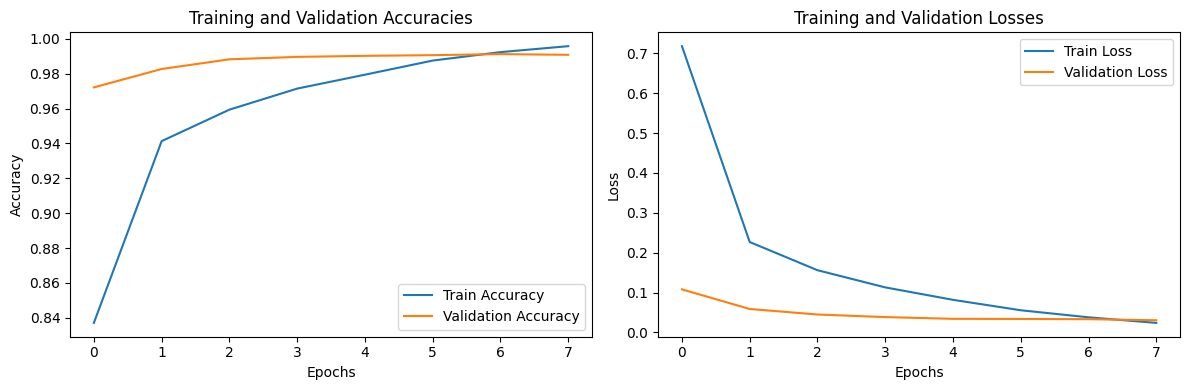

In [12]:
# Plotting the accuracy graph
epochs_range = range(current_epoch + 1)
plt.figure(figsize=(12, 4))

# Subplot for accuracy
plt.subplot(1, 2, 1)
plt.plot(epochs_range, training_accuracies, label='Train Accuracy')
plt.plot(epochs_range, validation_accuracies, label='Validation Accuracy')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracies')

# Subplot for loss
plt.subplot(1, 2, 2)
plt.plot(epochs_range, training_losses, label='Train Loss')
plt.plot(epochs_range, validation_losses, label='Validation Loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Losses')

plt.tight_layout()
plt.show()


C:\Users\jagan sri\AppData\Local\Temp\ipykernel_10488\3881603636.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(['{:.0f}%'.format(x) for x in plt.gca().get_yticks()])


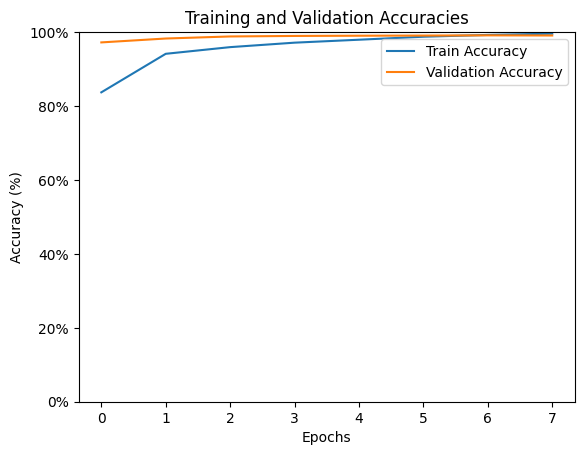

In [13]:
import matplotlib.pyplot as plt

epochs_range = range(current_epoch + 1)
plt.plot(epochs_range, [acc * 100 for acc in training_accuracies], label='Train Accuracy')
plt.plot(epochs_range, [acc * 100 for acc in validation_accuracies], label='Validation Accuracy')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.title('Training and Validation Accuracies')

# Set y-axis lower limit to 0 and upper limit to 100
plt.ylim(0, 100)

# Format y-axis tick labels as percentages
plt.gca().set_yticklabels(['{:.0f}%'.format(x) for x in plt.gca().get_yticks()])

plt.show()


Test Accuracy

In [17]:
correct_predictions = [0] * 38  # To keep track of correct predictions for each class
total_samples = [0] * 38  # To keep track of total samples for each class

model2.eval()  # Set the model to evaluation mode

with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(my_device), labels.to(my_device)

        outputs = model2(inputs)
        _, predicted = torch.max(outputs, 1)

        # Update statistics for each class
        for i in range(len(predicted)):
            total_samples[labels[i]] += 1
            if predicted[i] == labels[i]:
                correct_predictions[labels[i]] += 1
class_folders=['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Target_Spot', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Tomato___Tomato_mosaic_virus', 'Tomato___healthy']
# Calculate and print performance for each class
for i in range(38):
    accuracy = correct_predictions[i] / total_samples[i] if total_samples[i] > 0 else 0
    print(f"Class {class_folders[i]}: Accuracy = {accuracy:.2%} ({correct_predictions[i]}/{total_samples[i]})")

overall_accuracy = sum(correct_predictions) / sum(total_samples)
print(f"\nOverall Accuracy: {overall_accuracy:.2%}")


Class Apple___Apple_scab: Accuracy = 97.62% (123/126)
Class Apple___Black_rot: Accuracy = 100.00% (125/125)
Class Apple___Cedar_apple_rust: Accuracy = 100.00% (55/55)
Class Apple___healthy: Accuracy = 100.00% (150/150)
Class Blueberry___healthy: Accuracy = 100.00% (150/150)
Class Cherry_(including_sour)___Powdery_mildew: Accuracy = 100.00% (150/150)
Class Cherry_(including_sour)___healthy: Accuracy = 99.33% (149/150)
Class Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot: Accuracy = 90.38% (94/104)
Class Corn_(maize)___Common_rust_: Accuracy = 99.33% (149/150)
Class Corn_(maize)___Northern_Leaf_Blight: Accuracy = 96.67% (145/150)
Class Corn_(maize)___healthy: Accuracy = 100.00% (150/150)
Class Grape___Black_rot: Accuracy = 99.33% (149/150)
Class Grape___Esca_(Black_Measles): Accuracy = 100.00% (150/150)
Class Grape___Leaf_blight_(Isariopsis_Leaf_Spot): Accuracy = 100.00% (150/150)
Class Grape___healthy: Accuracy = 100.00% (86/86)
Class Orange___Haunglongbing_(Citrus_greening): Accura

In [18]:
true_labels = []
test_predictions = []

model2.eval()  # Set the model to evaluation mode

with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(my_device), labels.to(my_device)

        outputs = model2(inputs)
        _, predicted = torch.max(outputs, 1)

        true_labels.extend(labels.cpu().numpy())
        test_predictions.extend(predicted.cpu().numpy())


In [20]:
from sklearn.metrics import precision_recall_fscore_support, confusion_matrix
from sklearn.metrics import f1_score, confusion_matrix
import numpy as np
# Calculate F1 score, precision, and recall for overall data
f1_micro = f1_score(true_labels, test_predictions, average='micro')
precision_micro, recall_micro, _, _ = precision_recall_fscore_support(true_labels, test_predictions, average='micro')

print(f"Overall Metrics:")
print(f"\t F1 Micro Score: {f1_micro:.4f}")
print(f"\t Precision Micro: {precision_micro:.4f}")
print(f"\t Recall Micro: {recall_micro:.4f}")

# Calculate confusion matrix
conf_matrix = confusion_matrix(true_labels, test_predictions, labels=range(38))

# Print or visualize the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)


Overall Metrics:
	 F1 Micro Score: 0.9903
	 Precision Micro: 0.9903
	 Recall Micro: 0.9903
Confusion Matrix:
[[123   1   0 ...   0   0   0]
 [  0 125   0 ...   0   0   0]
 [  0   0  55 ...   0   0   0]
 ...
 [  0   0   0 ... 150   0   0]
 [  0   0   0 ...   0  76   0]
 [  0   0   0 ...   0   0 150]]


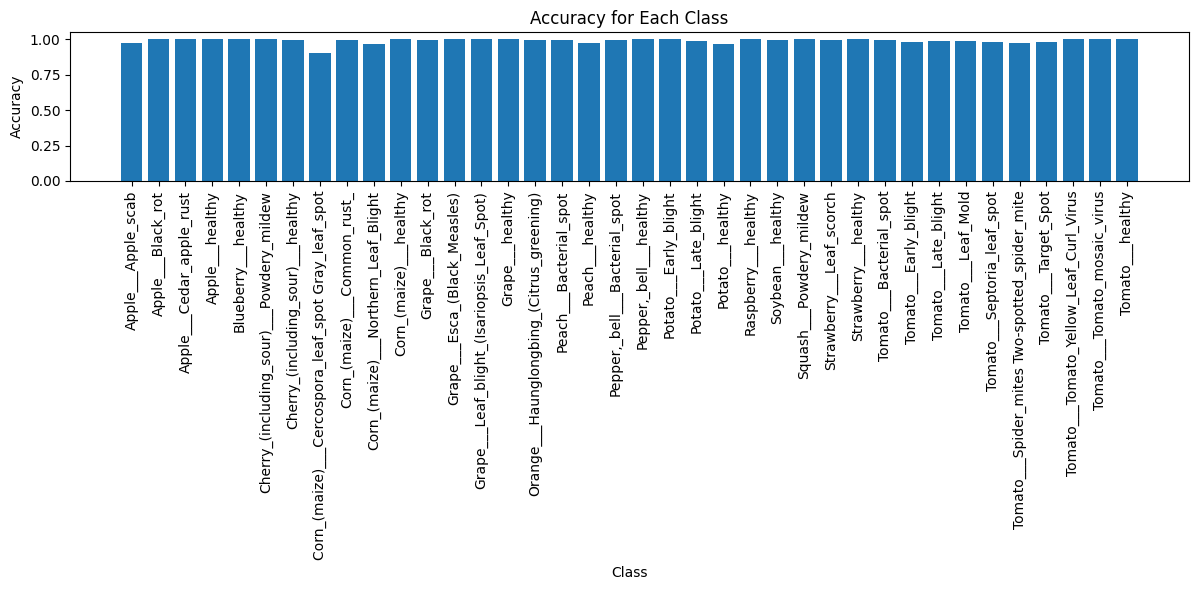

In [21]:
import matplotlib.pyplot as plt

# Calculate accuracy values for each class
class_accuracy = [correct_predictions[i] / total_samples[i] if total_samples[i] > 0 else 0 for i in range(38)]

# Plotting the bar graph
plt.figure(figsize=(12, 6))  # Adjust the figure size if needed
plt.bar(class_folders, class_accuracy)
plt.xlabel('Class')
plt.ylabel('Accuracy')
plt.title('Accuracy for Each Class')
plt.xticks(rotation=90)  # Rotate class names for better visibility
plt.tight_layout()  # Ensure labels fit within the figure
plt.show()


In [34]:
torch.save(model2.state_dict(), "/content/drive/MyDrive/Resnet/Resnet18_sgd.pth")

# Image Prediction

SGD optimizer

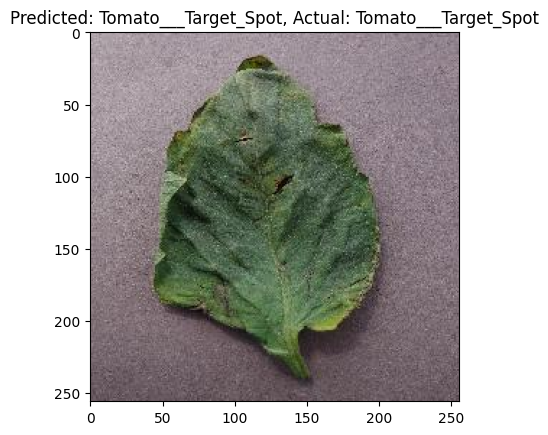

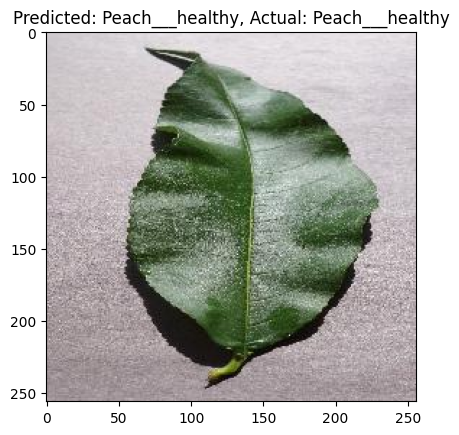

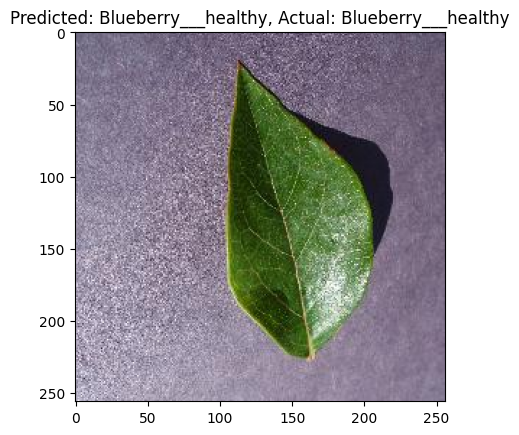

In [22]:
import torch
import matplotlib.pyplot as plt
import random

# Assuming your model is named 'model2'
# Assuming your test loader is named 'my_test_loader'

# Set the model to evaluation mode
model2.eval()

# Get class names
class_folders = test_loader.dataset.classes

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

for _ in range(3):  # Display three random images
    # Get random index
    random_index = random.randint(0, len(test_loader.dataset) - 1)
    # Get data at the chosen index
    inputs, labels = test_loader.dataset[random_index]
    inputs = inputs.unsqueeze(0)  # Add a batch dimension
    inputs = inputs.to(device)  # Move the inputs to the same device as the model

    # Move the model to the same device as inputs
    model2.to(device)

    # Make predictions using the model
    with torch.no_grad():
        outputs = model2(inputs)

    # Move the outputs back to the CPU if needed
    outputs = outputs.cpu()

    # Get predicted class index
    _, predicted_idx = torch.max(outputs, 1)
    predicted_idx = predicted_idx.item()

    # Get class names
    predicted_label = class_folders[predicted_idx]
    actual_label = class_folders[labels]

    # Load and display the image
    image = inputs.squeeze().cpu().numpy().transpose((1, 2, 0))  # Convert tensor to numpy image format
    plt.imshow(image)
    plt.title(f"Predicted: {predicted_label}, Actual: {actual_label}")
    plt.show()


Adam optimizer

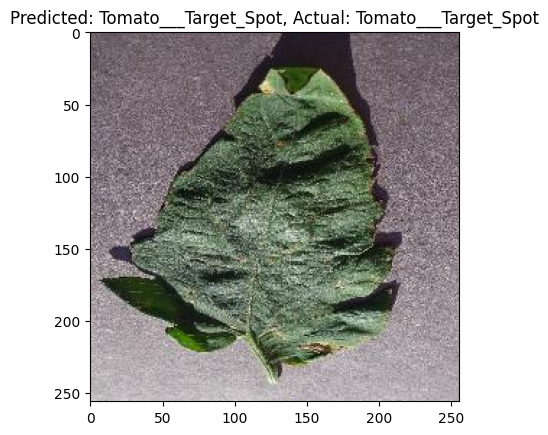

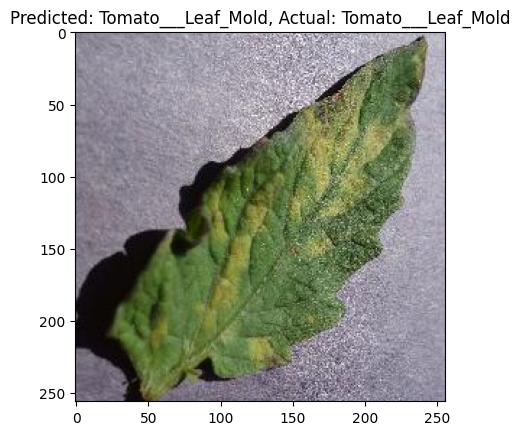

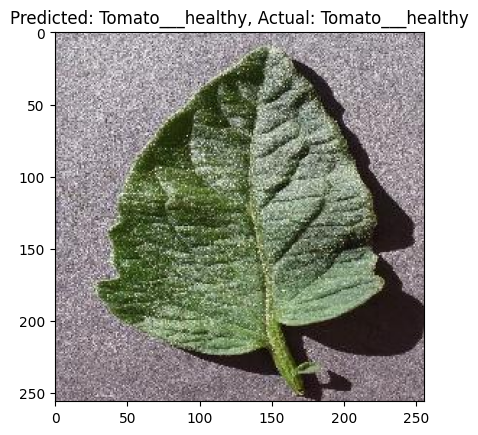

In [36]:
import torch
import matplotlib.pyplot as plt
import random

# Assuming your model is named 'model'
# Assuming your test loader is named 'test_loader'

# Set the model to evaluation mode
model.eval()

# Get class names
class_folders = test_loader.dataset.classes

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

for _ in range(3):  # Display three random images
    # Get random index
    random_index = random.randint(0, len(test_loader.dataset) - 1)
    # Get data at the chosen index
    inputs, labels = test_loader.dataset[random_index]
    inputs = inputs.unsqueeze(0)  # Add a batch dimension
    inputs = inputs.to(device)  # Move the inputs to the same device as the model

    # Move the model to the same device as inputs
    model.to(device)

    # Make predictions using the model
    with torch.no_grad():
        outputs = model(inputs)

    # Move the outputs back to the CPU if needed
    outputs = outputs.cpu()

    # Get predicted class index
    _, predicted_idx = torch.max(outputs, 1)
    predicted_idx = predicted_idx.item()

    # Get class names
    predicted_label = class_folders[predicted_idx]
    actual_label = class_folders[labels]

    # Load and display the image
    image = inputs.squeeze().cpu().numpy().transpose((1, 2, 0))  # Convert tensor to numpy image format
    plt.imshow(image)
    plt.title(f"Predicted: {predicted_label}, Actual: {actual_label}")
    plt.show()


We can Predict the Data out of Data Set Upload the image and Paste the image path where you stored the image

image predict using adam optimizer

In [37]:
!pip install matplotlib pillow
import torch
import torchvision.transforms as transforms
from PIL import Image
import matplotlib.pyplot as plt

# Load the trained model
# model = ... (Load your trained model here)
model.eval()

# Define the transformation pipeline (similar to what you used for training)
transform = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.ToTensor(),
    # Add any other transformations you used during training
])
def preprocess_image(image_path):
    image = Image.open(image_path)
    image = transform(image)
    return image.unsqueeze(0)  # Add a batch dimension



In [38]:
def predict_and_display(image_path):
    image = preprocess_image(image_path)
    image = image.to(device)  # Move input data to the same device as the model
    model.to(device)  # Move the model to the same device as the input data
    with torch.no_grad():
        outputs = model(image)
        print(outputs)
    _, predicted = torch.max(outputs, 1)

    print(predicted)
    class_names = train_data.classes  # Replace with your class names
    predicted_class = class_names[predicted.item()]
    print(train_data.classes)

    plt.imshow(image.squeeze().permute(1, 2, 0).cpu())  # Move image back to CPU for display
    plt.title(f"Predicted : {predicted_class}")
    plt.axis('off')
    plt.show()

# Replace 'image_path' with the path to an image in your Google Drive



tensor([[ -3.4171,  -5.3640,  -2.1504,  -6.6778, -12.2559,   2.2710,  -8.8710,
          -9.8769, -10.4407, -11.9619,  -8.8955,  -7.1339,  -7.6332,  -7.4662,
          -4.6396,  -8.5333,  -8.6776, -14.5328, -10.9804,  -9.6597, -10.2175,
          -8.7133,  -8.3626,  -4.3390,  -8.8887,  -8.1555, -10.6788,  -9.4152,
          -9.7983,  -7.8239,  -5.7060, -10.1420,  -5.9199, -10.2670, -11.2732,
          -4.3930,  -7.7176,  -9.0214]], device='cuda:0')
tensor([5], device='cuda:0')
['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Ba

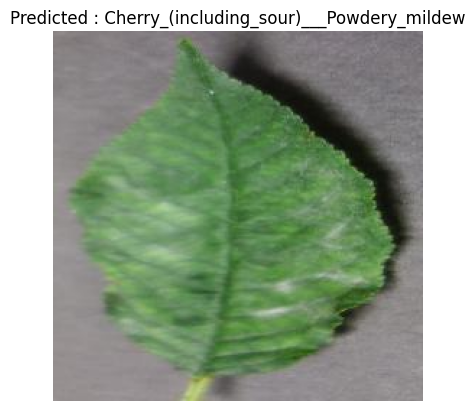

In [39]:
image_path = '/content/plantvillage/PlantVillage-Dataset-442d23a8a486febaad5c91e3c13ce30d4cd302ca/raw/color/Cherry_(including_sour)___Powdery_mildew/00705aa7-5ea2-4419-9440-8ba65e108eb9___FREC_Pwd.M 0267.JPG'
predict_and_display(image_path)